In [9]:
import os
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as st
from scipy.stats import shapiro
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

if os.name =='nt':
    font_family="Malgun Gothic"
else:
    font_family="AppleGothic"
sns.set(font=font_family,rc={"axes.unicode_minus":False})

In [3]:
a=[66,74,82,75,73,97,87,78]
b=[72,51,59,62,74,64,78,63]
c=[61,60,57,60,81,77,70,71]
d=[63,61,76,84,58,65,69,80]
print('a평균:',np.mean(a))
print('b평균:',np.mean(b))
print('c평균:',np.mean(c))
print('d평균:',np.mean(d))

a평균: 79.0
b평균: 65.375
c평균: 67.125
d평균: 69.5


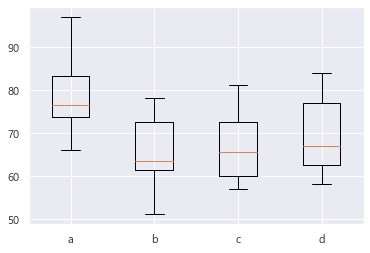

In [4]:
plot_data = [a,b,c,d]
plt.boxplot(plot_data)
plt.xticks([1,2,3,4],['a','b','c','d'])
plt.show()

In [6]:
check=['a','b','c','d']
check = [check[j] for j in range(4) for i in range(8)]
data = pd.DataFrame({'점수':a+b+c+d,'교육기관':check})
data.head()

,점수,교육기관
0,66,a
1,74,a
2,82,a
3,75,a
4,73,a


In [10]:
print('정규성을 검정')
normal_a=shapiro(a)
normal_b=shapiro(b)
normal_c=shapiro(c)
normal_d=shapiro(d)

정규성을 검정


In [11]:
print(normal_a)
print(normal_b)
print(normal_c)
print(normal_d)

print(stats.ks_2samp(a,b),stats.ks_2samp(a,c),stats.ks_2samp(a,d),stats.ks_2samp(b,c),stats.ks_2samp(b,d),stats.ks_2samp(c,d), sep="\n")

print('등분산성 검정')
from scipy.stats import levene
print(levene(a,b,c,d))
from scipy.stats import bartlett
print(bartlett(a,b,c,d))

ShapiroResult(statistic=0.9516036510467529, pvalue=0.7273865938186646)
ShapiroResult(statistic=0.9632648825645447, pvalue=0.8405646681785583)
ShapiroResult(statistic=0.8988886475563049, pvalue=0.2823662757873535)
ShapiroResult(statistic=0.93294757604599, pvalue=0.5432827472686768)
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.5, pvalue=0.2826728826728826)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
등분산성 검정
LeveneResult(statistic=0.07560756075607561, pvalue=0.972627101462453)
BartlettResult(statistic=0.07373983712569482, pvalue=0.9947906337756077)


In [12]:
f_statisitc,pval = stats.f_oneway(a,b,c,d)

print('F={0:.1f},p={1:.3f}'.format(f_statisitc,pval))

if pval <0.05:
    print("귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다")
else:
    print("귀무가설 기각, 4개의 교육훈련 기법간이 차이가 없다")

F=3.5,p=0.029
귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다


In [15]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model_1A= ols('점수 ~ C(교육기관)',data).fit()
anova_lm_result = anova_lm(model_1A)
anova_lm_result

,df,sum_sq,mean_sq,F,PR(>F)
C(교육기관),3.0,885.25,295.083333,3.482176,0.028897
Residual,28.0,2372.75,84.741071,NaN,NaN


In [16]:
pval = anova_lm_result['PR(>F)'][0]
if pval <0.05:
    print("귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.")
else:
    print("귀무가설 채택, 4개의 교육훈련 기법간이 차이가 없다")

귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.


In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

HSD = pairwise_tukeyhsd(data['점수'],data['교육기관'],alpha=0.05)
HSD.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,-13.625,0.0298,-26.1919,-1.0581,True
a,c,-11.875,0.0692,-24.4419,0.6919,False
a,d,-9.5,0.1896,-22.0669,3.0669,False
b,c,1.75,0.9809,-10.8169,14.3169,False
b,d,4.125,0.8068,-8.4419,16.6919,False
c,d,2.375,0.9546,-10.1919,14.9419,False


In [21]:
dat = pd.DataFrame({'판유리':['유리1','유리1','유리1','유리2','유리2','유리2','유리3','유리3','유리3','유리1',
                           '유리1','유리1','유리2','유리2','유리2', '유리3','유리3','유리3','유리1','유리1',
                           '유리1','유리2','유리2','유리2','유리3','유리3','유리3'],
                   '온도':[100,100,100,100,100,100,100,100,100,100,
                         125,125,125,125,125,125,125,125,125,125,
                         150,150,150,150,150,150,150],
                  '강도':[580,568,570,550,530,579,546,575,599,1090,
                        1087,1085,1070,1035,1000,1045,1053,1066,1392,1380,
                        1386,1328,1312,1299,867,904,889]})

In [22]:
dat.head()

,판유리,온도,강도
0,유리1,100,580
1,유리1,100,568
2,유리1,100,570
3,유리2,100,550
4,유리2,100,530


In [24]:
dat.groupby(['판유리','온도']).agg(len)

강도
판유리 온도     
유리1 100   4
    125   4
    150   1
유리2 100   3
    125   3
    150   3
유리3 100   3
    125   3
    150   3

In [26]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('강도 ~C(판유리)*C(온도)',dat).fit()
anova_result =pd.DataFrame(anova_lm(model))

In [27]:
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(판유리),2.0,1.508645e+05,75432.259259,4.567131,2.487656e-02
C(온도),2.0,1.756994e+06,878496.945455,53.189587,2.784348e-08
C(판유리):C(온도),4.0,2.131777e+05,53294.416162,3.226770,3.667744e-02
Residual,18.0,2.972940e+05,16516.333333,NaN,NaN


In [28]:
dat['온도']=dat['온도'].astype('str')
dat['combi']=dat.판유리+"/"+dat.온도
print(pairwise_tukeyhsd(dat['강도'],dat['combi']))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2  meandiff p-adj    lower      upper   reject
------------------------------------------------------------
유리1/100 유리1/125     534.0 0.0004   215.5884  852.4116   True
유리1/100 유리1/150     684.0 0.0039   180.5471 1187.4529   True
유리1/100 유리2/100    -149.0 0.8334  -492.9238  194.9238  False
유리1/100 유리2/125     333.0  0.062   -10.9238  676.9238  False
유리1/100 유리2/150     611.0 0.0002   267.0762  954.9238   True
유리1/100 유리3/100 -128.6667 0.9153  -472.5905  215.2571  False
유리1/100 유리3/125  352.6667  0.042     8.7429  696.5905   True
유리1/100 유리3/150  184.6667 0.6333  -159.2571  528.5905  False
유리1/125 유리1/150     150.0 0.9755  -353.4529  653.4529  False
유리1/125 유리2/100    -683.0    0.0 -1026.9238 -339.0762   True
유리1/125 유리2/125    -201.0 0.5331  -544.9238  142.9238  False
유리1/125 유리2/150      77.0  0.996  -266.9238  420.9238  False
유리1/125 유리3/100 -662.6667 0.0001 -1006.5905 -318.7429   True
유리1/125 유리3/125 -181.333